         Date  Actual_Price  Predicted_Price
0  2022-09-02       19952.7        19473.771
1  2022-09-03       19831.4        19438.750
2  2022-09-04       19999.9        19372.838
3  2022-09-05       19793.1        19405.834
4  2022-09-06       18786.4        19338.398
         Date  Actual_Price  Predicted_Price
0  2022-09-02       19952.7        20788.550
1  2022-09-03       19831.4        20692.262
2  2022-09-04       19999.9        20599.492
3  2022-09-05       19793.1        20550.746
4  2022-09-06       18786.4        20512.186
✅ Figure saved: ../outputs/figures\LSTM_BiLSTM_Avg_Actual_vs_Predicted.png


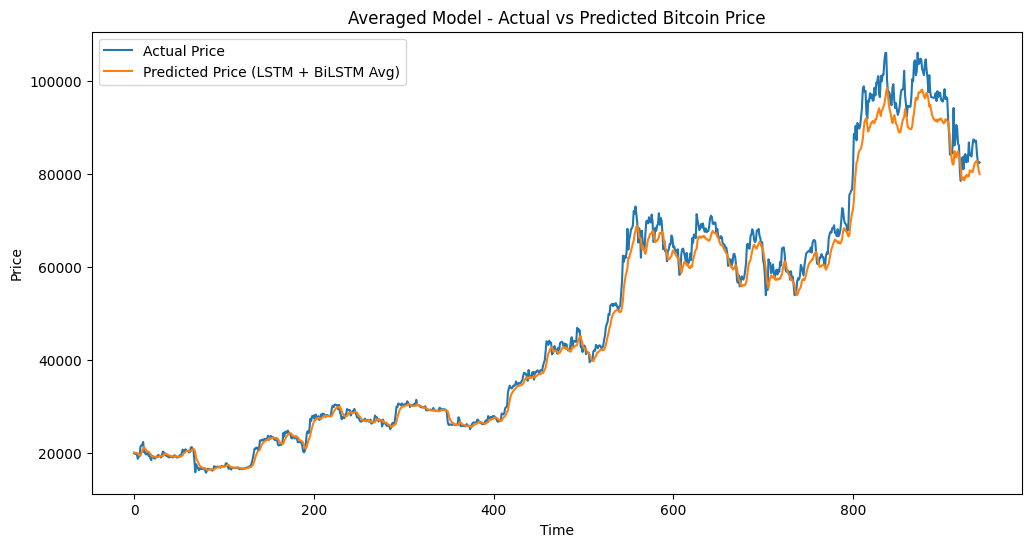

📋 Averaged Model Evaluation Metrics:
   MAE: 1910.7841
   MSE: 8462976.4614
   RMSE: 2909.1195
   R²: 0.9875
✅ Averaged model saved to ../models/lstm_bilstm_avg_model.pkl


In [1]:
# 07b_modeling_lstm_bilstm_avg.ipynb

import sys
sys.path.append('../src')
from utils import save_fig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import joblib

# Paths
outputs_dir = '../outputs/metrics'
figures_dir = '../outputs/figures'
models_dir = '../models'

# --------------------------
# 📥 Load LSTM & BiLSTM Predictions
# --------------------------
lstm_preds = pd.read_csv(os.path.join(outputs_dir, 'LSTM_predictions.csv'))
bilstm_preds = pd.read_csv(os.path.join(outputs_dir, 'BiLSTM_predictions.csv'))

# Check structure
print(lstm_preds.head())
print(bilstm_preds.head())

# Rename columns to match if needed
lstm_preds.columns = ['Date', 'Actual', 'Predicted'] if 'Actual_Price' not in lstm_preds.columns else ['Date', 'Actual', 'Predicted']
bilstm_preds.columns = ['Date', 'Actual', 'Predicted'] if 'Actual_Price' not in bilstm_preds.columns else ['Date', 'Actual', 'Predicted']

# Merge predictions on 'Date'
merged = pd.merge(lstm_preds, bilstm_preds, on='Date', suffixes=('_lstm', '_bilstm'))

# Use the actuals from either (they should be same)
merged['Actual_Price'] = merged['Actual_lstm']

# Calculate average predictions
merged['Predicted_Price'] = (merged['Predicted_lstm'] + merged['Predicted_bilstm']) / 2

# --------------------------
# 💾 Save CSV
# --------------------------
avg_preds = merged[['Date', 'Actual_Price', 'Predicted_Price']]
avg_preds.to_csv(os.path.join(outputs_dir, 'LSTM_BiLSTM_Avg_predictions.csv'), index=False)

# --------------------------
# 📊 Plotting
# --------------------------
plt.figure(figsize=(12,6))
plt.plot(avg_preds['Actual_Price'], label='Actual Price')
plt.plot(avg_preds['Predicted_Price'], label='Predicted Price (LSTM + BiLSTM Avg)')
plt.title('Averaged Model - Actual vs Predicted Bitcoin Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
save_fig("LSTM_BiLSTM_Avg_Actual_vs_Predicted")
plt.show()

# --------------------------
# 📈 Metrics
# --------------------------
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_true = avg_preds['Actual_Price']
y_pred = avg_preds['Predicted_Price']

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"📋 Averaged Model Evaluation Metrics:")
print(f"   MAE: {mae:.4f}")
print(f"   MSE: {mse:.4f}")
print(f"   RMSE: {rmse:.4f}")
print(f"   R²: {r2:.4f}")

# --------------------------
# 💾 Save Model
# --------------------------
joblib.dump(avg_preds, os.path.join(models_dir, 'lstm_bilstm_avg_model.pkl'))
print("✅ Averaged model saved to ../models/lstm_bilstm_avg_model.pkl")